<center><b>Individual Project Presentation</b></center>




<center><b><font size="6">Taxes and Why It Matters</b></font><center>
    
    


<center>By Kenneth Martinez</center>
    
    

---

<b><font size="5"><span style="color:green">So what are Taxes?</span></b></font>


According to Merriam-Webster...


In [485]:
%%html
<iframe src="https://www.merriam-webster.com/dictionary/taxes" width="900" height="400"></iframe>

# <center><b><font size="5"><span style="color:green">How much are governments collecting?</span></b></font></center>

<!--  ![Newsom_Surplus](../../Img/Newsom_Surplus.png) -->
<img src="../Img/Newsom_Surplus.png" style="width:400px;height:600px"/>

<!-- ![Newsom_Surplus](../../Img/how_to_collect.png) -->
<img src="../Img/how_to_collect.png" style="width:300px;height:400px"/>

![Newsom_Surplus](../Img/enter_corgis.png)

# <center><b><font size="5"><span style="color:blue">First, let's install some libraries.</span></b></font></center>

In [3]:
#If already installed, comment out and continue
!pip install geopandas 
!pip install mapclassify
!pip install descartes
!pip install pipwin
!pipwin install gdal
!pipwin install fiona

/Users/kenneth/opt/anaconda3/lib/python3.8/site-packages/pipwin/command.py:66: UserWarning: Found a non Windows system. Package installation might not work.
  warn("Found a non Windows system. Package installation might not work.")
Package `gdal` found in cache
https://download.lfd.uci.edu/pythonlibs/archived/GDAL-3.4.3-cp38-cp38-win_amd64.whl
GDAL-3.4.3-cp38-cp38-win_amd64.whl
File /Users/kenneth/pipwin/GDAL-3.4.3-cp38-cp38-win_amd64.whl already exists
ERROR: GDAL-3.4.3-cp38-cp38-win_amd64.whl is not a supported wheel on this platform.
Traceback (most recent call last):
  File "/Users/kenneth/opt/anaconda3/bin/pipwin", line 8, in <module>
    sys.exit(main())
  File "/Users/kenneth/opt/anaconda3/lib/python3.8/site-packages/pipwin/command.py", line 103, in main
    cache.install(package)
  File "/Users/kenneth/opt/anaconda3/lib/python3.8/site-packages/pipwin/pipwin.py", line 301, in install
    subprocess.check_call([executable, "-m", "pip", "install", wheel_file])
  File "/Users/kenne

In [4]:
#Necessary libraies that make everything work
import os

import pandas as pd
import geopandas as gpd

import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Let's pop open the hood
finance_df = pd.read_csv('../../DigHum101-Individual_Project/finance.csv')
finance_df

# #Dataframe contains USA tax collection. Have to remove
states_finances_df = finance_df.drop(index=finance_df[finance_df['State'] == 'UNITED STATES'].index)

In [20]:
#Column Titles to see how data is segmented
list(finance_df)

['State',
 'Year',
 'Totals.Capital outlay',
 'Totals.Revenue',
 'Totals.Expenditure',
 'Totals.General expenditure',
 'Totals.General revenue',
 'Totals.Insurance trust  revenue',
 'Totals.Intergovernmental',
 'Totals.License tax',
 'Totals.Selective sales tax',
 'Totals.Tax',
 'Details.Correction.Correction Total',
 'Details.Education.Education Total',
 'Details.Financial Aid.Assistance and Subsidies',
 'Details.Financial Aid.Cash and Securities Total',
 'Details.Health.Health Total Expenditure',
 'Details.Intergovernmental.Intergovernmental Expenditure',
 'Details.Intergovernmental.Intergovernmental to Combined and Unallocable',
 'Details.Natural Resources.Natural Resources Construction',
 'Details.Utilities.Utilities Current Operation',
 'Details.Welfare.Welfare Institution Total Expenditure',
 'Details.Natural Resources.Parks.Parks Total Expenditure',
 'Details.Transportation.Highways.Highways Total Expenditure',
 'Totals. Debt at end of fiscal year',
 'Details.Insurance benefits 

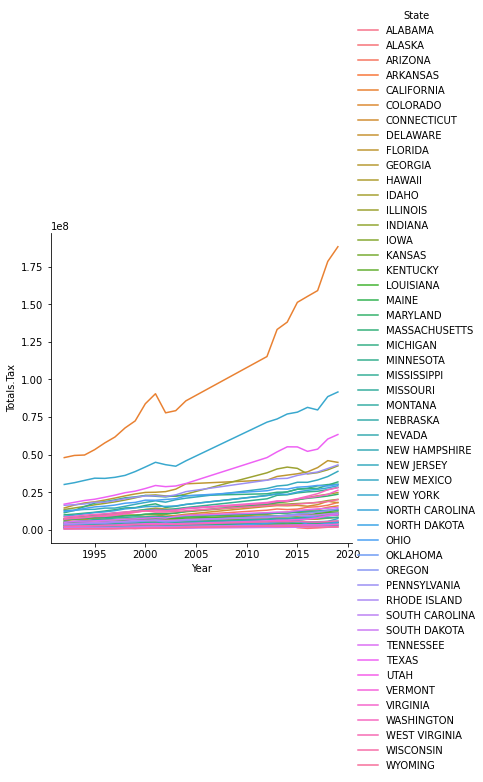

In [7]:
#Quick analysis to see if we see any outliers
sns.relplot (
    data=states_finances_df,
    kind="line",
    x="Year",
    y="Totals.Tax",
    hue="State",
);


# <center><b><font size="5"><span style="color:blue">That is a lot of data</span></b></font></center>

# <center><b><font size="5"><span style="color:orange">Let's focus on that orange line</span></b></font></center>

In [21]:
#This is to see what state collected the most money and in what year
max_tax_df = states_finances_df
max_tax_df.sort_values(by='Totals.Tax', inplace=True, ascending=False)
max_tax_df.iloc[0]

State                                                                      CALIFORNIA
Year                                                                             2019
Totals.Capital outlay                                                        12267721
Totals.Revenue                                                              436479413
Totals.Expenditure                                                          395722730
Totals.General expenditure                                                  337836399
Totals.General revenue                                                      336543686
Totals.Insurance trust  revenue                                              98972419
Totals.Intergovernmental                                                    102638475
Totals.License tax                                                           11041442
Totals.Selective sales tax                                                   18694463
Totals.Tax                                            

In [23]:
# To simplify analysis, specific data was chosen was chosen. Education, Health Services, 
# Correctional Services, and Police Services

california_totals_tax_2019 = max_tax_df.iloc[0]['Totals.Tax']

california_tax_spending_2019_df = max_tax_df.iloc[0][['Details.Correction.Correction Total',
                                                      'Details.Education.Education Total',
                                                      'Details.Health.Health Total Expenditure',
                                                      'Details.Police protection',
                                                     ]]

Description of data From the CORGIS Dataset Project.
Please note that this is state spend.


Details.Correction.Correction Total: Total amount spent on correctional purposes, such as prisons.

Details.Education.Education Total: Total amount spent on schools, colleges, and other educational institutions (e.g., for blind, deaf, and other handicapped individuals), and educational programs for adults, veterans, and other special classes. State institutions of higher education includes activities of institutions operated by the state, except that agricultural extension services and experiment stations are classified under Natural resources and hospitals serving the public are classified under Hospitals. Revenue and expenditure for dormitories, cafeterias, athletic events, bookstores, and other auxiliary enterprises financed mainly through charges for services are reported on a gross basis.

Details.Health.Health Total Expenditure: Total amount spent on outpatient health services, other than hospital care, including: public health administration; research and education; categorical health programs; treatment and immunization clinics; nursing; environmental health activities such as air and water pollution control; ambulance service if provided separately from fire protection services, and other general public health activities such as mosquito abatement. School health services provided by health agencies (rather than school agencies) are included here. Sewage treatment operations are classified under Sewerage.

Details.Police protection: Amounts of money spent on preservation of law and order and traffic safety


In [24]:
#This is $188 billion. 
california_totals_tax_2019

188235271

In [25]:
#Also billions
california_tax_spending_2019_df
california_tax_spending_2019_df.sum()

130616978

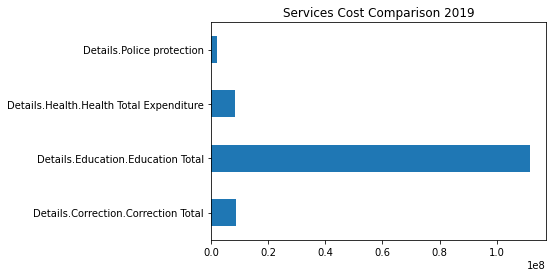

In [26]:
#Visual to compare spend on each of the four services

california_tax_spending_2019_df.plot.barh()
plt.title('Services Cost Comparison 2019', color='black')
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [13]:
#Proportion of tax collected and services paid
#These four services account for almost 70% of taxes collected

proportion_of_services_total_tax_ca_2019 = california_tax_spending_2019_df.sum()/california_totals_tax_2019
proportion_of_services_total_tax_ca_2019

0.6939027808449353

Please note that this is only a proportion based on "Compulsory contributions exacted by a government for public purposes except employee and employee assessments for retirement and social insurance purposes, which are classified as insurance trust revenue. All tax revenue is classified as general revenue and comprises amounts received (including interest and penalties but excluding protested amounts and refunds) from all taxes imposed by a government. Note that local government tax revenue excludes any amounts from shares of state-imposed and collected taxes, which are classified as Intergovernmental revenue."(From the CORGIS Dataset Project)

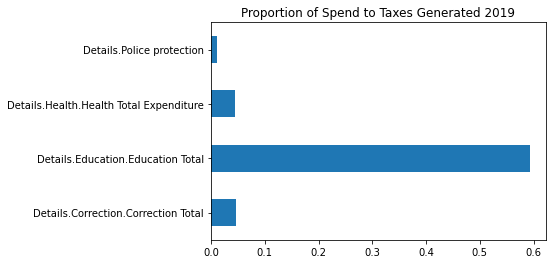

In [14]:
#Visual of proportional comparison

proportional_ca_breakdown_2019_df = california_tax_spending_2019_df/california_totals_tax_2019
proportional_ca_breakdown_2019_df.plot.barh()

plt.title('Proportion of Spend to Taxes Generated 2019', color='black')
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [15]:
#Formating data to get a better understanding of about how much was spent and collected on the four services.

##Please note that the Corgis Dataset provided the number in a format that made it seem as the money 
# collected was in millions, but state records show billions. A necessary adjustment was made to show in terms of billions

#Future versions of this project will use government data directly

california_correction_spending_2019 = california_tax_spending_2019_df['Details.Correction.Correction Total']
california_education_spending_2019 = california_tax_spending_2019_df['Details.Education.Education Total']
california_health_spending_2019 = california_tax_spending_2019_df['Details.Health.Health Total Expenditure']
california_police_spending_2019 = california_tax_spending_2019_df['Details.Police protection']
print("California Taxes Collected in 2019:" + " "+str("${:,.2f}".format(california_totals_tax_2019*1000)))
print("California Educational Spend in 2019:" + " "+str("${:,.2f}".format(california_education_spending_2019*1000)))
print("California Correctional Spend in 2019:" + " "+str("${:,.2f}".format(california_correction_spending_2019*1000)))
print("California Heath Services Spend in 2019:" + " "+str("${:,.2f}".format(california_health_spending_2019*1000)))
print("California Police Services Spend in 2019:" + " "+str("${:,.2f}".format(california_police_spending_2019*1000)))


California Taxes Collected in 2019: $188,235,271,000.00
California Educational Spend in 2019: $111,655,986,000.00
California Correctional Spend in 2019: $8,613,192,000.00
California Heath Services Spend in 2019: $8,239,367,000.00
California Police Services Spend in 2019: $2,108,433,000.00


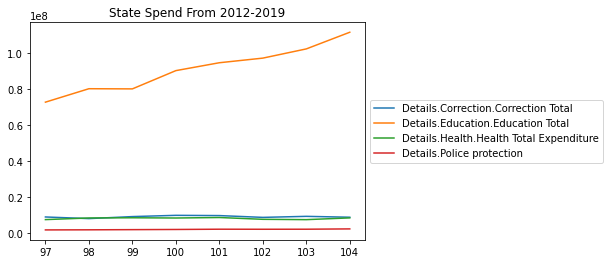

In [16]:
#Plot to show spend overtime. 2012-2019

california_finance_df = finance_df[finance_df['State'].str.contains('CALIFORNIA')]
california_2012_to_2019_df = california_finance_df.loc[california_finance_df['Year'] >= 2012]
california_2012_to_2019_df

select_data_california_2012_to_2019_df = california_2012_to_2019_df[['State','Details.Correction.Correction Total', 
                                                                    'Details.Education.Education Total',
                                                                   'Details.Health.Health Total Expenditure',
                                                                   'Details.Police protection']]


select_data_california_2012_to_2019_df.plot()


plt.title('State Spend From 2012-2019', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [17]:
#Showing all states in 2019 for spending in Education, Health, Corrections
df = finance_df
df_2019 = df.loc[df['Year'] == 2019]
select_2019_df = df_2019[['State','Details.Correction.Correction Total', 'Details.Education.Education Total',
                        'Details.Health.Health Total Expenditure','Details.Police protection','Totals.Tax']]
select_2019_df = select_2019_df.reset_index()
del select_2019_df['index']

select_2019_df




,State,Details.Correction.Correction Total,Details.Education.Education Total,Details.Health.Health Total Expenditure,Details.Police protection,Totals.Tax
0,ALABAMA,672347,12596861,573886,200242,11576632
1,ALASKA,330783,2505580,213255,157952,1780911
2,ARIZONA,1112554,13133885,591202,297521,18163903
3,ARKANSAS,355923,8076478,174227,111318,10217866
4,CALIFORNIA,8613192,111655986,8239367,2108433,188235271
5,COLORADO,1139197,12723219,586604,273868,15869834
6,CONNECTICUT,646375,7473560,1041673,266586,17993741
7,DELAWARE,359591,3606269,467832,153581,4595544
8,FLORIDA,2784002,30050827,4827762,651983,44799831
9,GEORGIA,1309641,20917587,1268351,496510,24712873


In [18]:
#Importing tools for interactive
import ipywidgets as widgets

In [19]:
# Interactive Tool to extract State finances on Education, Health Services, Police, and Corrections. 2012-2019
def state_and_year_spend(year,state):
    uppercase_state = state.upper()
    state_and_year = states_finances_df.loc[(states_finances_df['Year'] == year) & (states_finances_df['State'] == uppercase_state)]
    
    state_total_taxes = state_and_year.iloc[0]['Totals.Tax']
    state_correction_spending = state_and_year.iloc[0]['Details.Correction.Correction Total']
    state_education_spending = state_and_year.iloc[0]['Details.Education.Education Total']
    state_health_spending = state_and_year.iloc[0]['Details.Health.Health Total Expenditure']
    state_police_spending = state_and_year.iloc[0]['Details.Police protection']
    
    print(state +" Taxes Collected in " +str(year)+":" + " "+str("${:,}".format(state_total_taxes*1000)))
    print(state +" Educational spend in "+str(year)+":" + " "+str("${:,}".format(state_education_spending*1000)))
    print(state +" Correctional spend in "+str(year)+":" + " "+str("${:,}".format(state_correction_spending*1000)))
    print(state +" Heath Services spend "+str(year)+":" + " "+str("${:,}".format(state_health_spending*1000)))
    print(state +" Police Services spend "+str(year)+":" + " "+str("${:,}".format(state_police_spending*1000)))

widgets.interact(state_and_year_spend,year = [2012,2013,2014,2015,2016,2017,2018,2019], state = ['Alabama','Alaska',
    'Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho','Illinois',
    'Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota',
    'Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York',
    'North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina',
    'South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming'])



interactive(children=(Dropdown(description='year', options=(2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019), v…

<function __main__.state_and_year_spend(year, state)>